# Estimating Error Rate

A stockbroker company BlueSky states that it has a stock price prediction algorithm $A$ capable of forecasting stock price based on the history of price for a given stock. The algorithm predicts whether the stock price will rise or decrease by at least 5% in one week. Before giving our money to BlueSky, we required it to test the algorithm. To evaluate the algorithm, we collected data for 300 stocks. We split the data into a training set $S$ comprising 250 stocks and a testing set $T$ with the remaining 50 stocks. 

BlueSky trained the algorithm on the data from the training set. On the training set $S$ it predicted the development of the price for 200 stocks correctly and incorrectly for 50 stocks. On the test set $T$, the predictions of algorithm $A$ were correct 30 times and incorrect 20 times. 

Based on the above data, estimate the error rate of algorithm $A$ and compute a confidence interval that contains the algorithm's actual error rate with the probability of at least 95%.

The error rate of algorithm $A$ must be estimated on the test set that is independent of the train set. As there are two possible outcomes of the test, the error of the algorithm has a Bernoulli probability distribution with the probability of an error $p \in \langle 0;1\rangle$. The value of the error we can estimate according to the number of errors on the test set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, norm

## Estimating the Error Rate 

The number of errors made by algorithm $A$ has a probability distribution of the sum of $n=$ `size_T` random variables from Bernoulli distribution $Bernoulli(p)$, where $p$ is the error rate of algorithm $A$ - this is the binomial distribution $Bi(n,p)$. The variance of the number of errors is $$np(1-p).$$

The true error rate $p$ is not known, but we can estimate $p$ using MLE &ndash; Maximum Likelihood Estimate &ndash; as the error rate for which the observed number of errors has the maximal likelihood.

In [2]:
size_T = 50;
errors_T = 20;
error_estimate = errors_T / size_T
print(f'Error estimate: {error_estimate}')

Error estimate: 0.4


### The Variance of the Error Estimate

**Warning:** We must distinguish between
* *variance of the error rate* &ndash; this is the variance of the Bernoulli distribution $Bernoulli(p)$, that is $$\mathrm{Var}(Bernoulli(p))= p(1-p),$$  and
* *variance of the **estimate** of the error rate* &ndash; this strongly depends on the number of tests and must be computed based on the variance of the Binomial distribution $Bi(n,p)$.  

Hence, the variance of the **estimate** of the error rate of the algorithm is 

In [3]:
var_num_errors = size_T * error_estimate * (1 - error_estimate)
print(f'The variance for the number of errors (binomial distribution) is {var_num_errors}')
print(f'The standard deviation for the number of errors (binomial distribution)'
      f' is {np.sqrt(var_num_errors)}')

The variance for the number of errors (binomial distribution) is 12.0
The standard deviation for the number of errors (binomial distribution) is 3.4641016151377544


In [4]:
sd_of_error_rate_estimate = np.sqrt(var_num_errors)/size_T
print(f'The standard deviation of the error rate ESTIMATE is {sd_of_error_rate_estimate}')

The standard deviation of the error rate ESTIMATE is 0.06928203230275509


Let us plot the distribution for the probability of the **number** of errors. This is a discrete probability distribution - we will plot the *probability mass function* - the probabilities for each possible number of errors between 0 and `size_T = 50`.

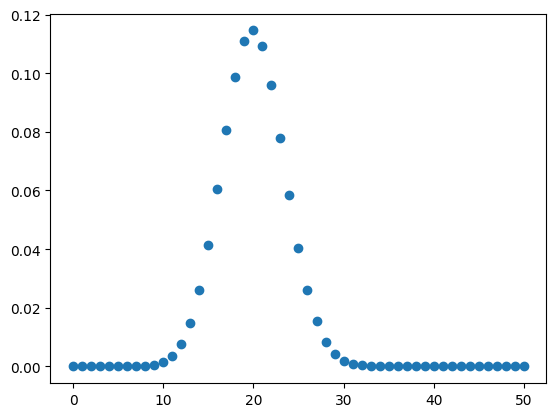

In [7]:
# from the previous lab
x = np.arange(size_T + 1)
# e.g., using plt.scatter(x,...)
# YOUR CODE HERE
plt.scatter(x,binom.pmf(x,size_T,error_estimate))


Plot the corresponding probability mass function for the error rate.

In [ ]:
# probabilistic mass function for the error rate

# from the previous lab
x = np.arange(size_T + 1)
# plt.scatter(x/size_T,...)
# YOUR CODE HERE
raise NotImplementedError()

We can plot the cummulative density function for the number of errors.

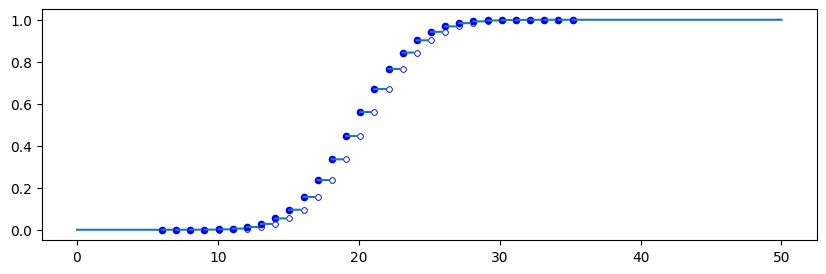

In [8]:
def plot_discreete_cdf(x,y):
    # insert discontinuities where the value between two points differ
    pos = np.where(np.abs(np.diff(y)) >= 0.00001)[0]+1
    xx = np.insert(x, pos, np.nan)
    yy = np.insert(y, pos, np.nan)

    plt.figure(figsize=(10,3))
    plt.plot(xx,yy)
    # plot end markers
    plt.scatter(x[pos],y[pos],s=20,c='b',marker='o')
    plt.scatter(x[pos],y[pos-1],s=20,c='b',marker=r'$\bigcirc$',linewidth=0.25)
    
x = np.linspace(0,50,200)
y = binom.cdf(x, size_T, error_estimate)
plot_discreete_cdf(x,y)

What is the probability that the algorithm will make more than 10, 20 or 30 errors in a series of `size_T=50` tests?

In [11]:
# complete the code below
for errors in [10, 20, 30]:
    print("Probability of at most", errors, " errors =", binom.cdf(errors, size_T, error_estimate))
    
for errors in [10, 20, 30]:
    print("Probability of more then", errors, " errors =", 1 - binom.cdf(errors, size_T, error_estimate))
    

Probability of at most 10  errors = 0.002197144757246684
Probability of at most 20  errors = 0.5610349320400654
Probability of at most 30  errors = 0.9986262383079849
Probability of more then 10  errors = 0.9978028552427534
Probability of more then 20  errors = 0.4389650679599346
Probability of more then 30  errors = 0.0013737616920150852


What is the probability that the error of $A$ is higher than 30, 50, 60 or 90 percent?

In [20]:
# from the previous lab
for rate in [0.3, 0.5, 0.6,0.9]:
    num_errors = size_T*rate
    print("Probability more then", rate, " error rate =", 1-binom.cdf(num_errors,size_T,error_estimate))

Probability more then 0.3  error rate = 0.9044982926444816
Probability more then 0.5  error rate = 0.057343760542200584
Probability more then 0.6  error rate = 0.0013737616920150852
Probability more then 0.9  error rate = 1.5654144647214707e-14


For which value `nE` does it hold that the probability algorithm $A$ makes more than `nE` errors in `size_T=50` trials is less than `alpha = 0.05, 0.01`?

In [24]:
alpha = [0.05, 0.01]
for a in alpha: 
    print("The probability that the algorithm makes more then", binom.isf(a, size_T, error_estimate),
          " errors is less than", a)

The probability that the algorithm makes more then 26.0  errors is less than 0.05
The probability that the algorithm makes more then 28.0  errors is less than 0.01


Approximate the probability mass function of the error rate by a density function of a suitable normal distribution.

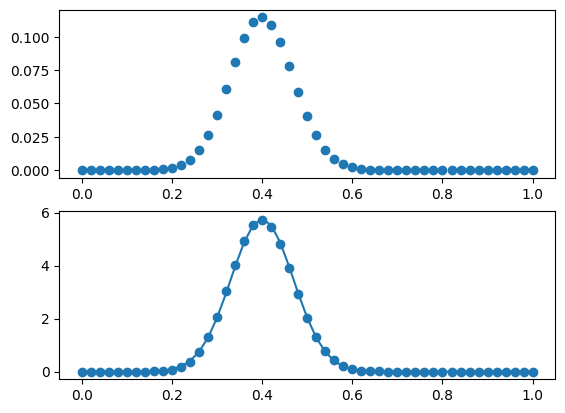

In [44]:
fig,axs = plt.subplots(2,1)
# probability mass function for the error rate
x = np.arange(size_T + 1)
axs[0].scatter(x/size_T,binom.pmf(x, size_T, error_estimate))

# probability mass function for the error rate scaled 
# so that it approximates the probabilty density function
axs[1].scatter(x/size_T,size_T*binom.pmf(x,size_T,error_estimate))

# plot the density of the approximating normal distribution
axs[1].plot(x/size_T,norm.pdf(x/size_T,error_estimate,sd_of_error_rate_estimate))

Plot the cumulative density functions for both 
1. the estimation of the error rate
2. the normal distribution approximating **estimate** of the error rate

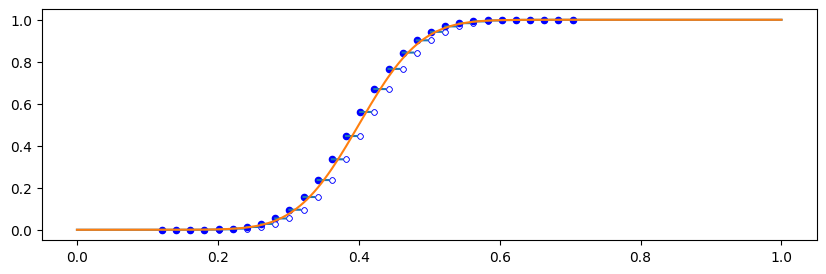

In [46]:
x = np.linspace(0,50,200)
plot_discreete_cdf(x/size_T,binom.cdf(x, size_T, error_estimate))
plt.plot(x/size_T,norm.cdf(x/size_T,error_estimate,sd_of_error_rate_estimate))


###  Determining the Confidence Interval
For different values of confidence `alpha = [0.95, 0.99]`, we have two possibilities:
* to find an interval $\langle 0; h \rangle$ such that the actual error rate of the algorithm $A$ belongs to the interval with probability `alpha`, or
* to find an interval $\langle d; h \rangle$ such that the actual error rate of the algorithm $A$ belongs to the interval with probability `alpha`, 
Compute both of them.

In [48]:
alpha = [0.95, 0.99]
for a in alpha:
    print(f"With probability more than {a} the true error rate is "
          f"in the interval <0;{binom.ppf(a, size_T,error_estimate)/size_T}>")
          

With probability more than 0.95 the true error rate is in the interval <0;0.52>
With probability more than 0.99 the true error rate is in the interval <0;0.56>


With sufficient trials, we can approximate the binomial distribution $Bi(n,p)$ by a normal distribution. Compute the above confidence intervals using the approximation.

The normal distribution $$\mathcal{N}\left(error\_estimate, sd\_of\_error\_rate\_estimate \right)$$

In [50]:
alpha = [0.95, 0.99]
for a in alpha:
    d = error_estimate - norm.ppf((1+a)/2) * sd_of_error_rate_estimate
    h = error_estimate + norm.ppf((1+a)/2) * sd_of_error_rate_estimate
    
    print(f"With probability more than {a} the true error rate is "
          f"in the interval <{d:.3f};{h:.3f}>")

With probability more than 0.95 the true error rate is in the interval <0.264;0.536>
With probability more than 0.99 the true error rate is in the interval <0.222;0.578>


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c17e1ac-b2cc-421e-8492-9f456eb1f406' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>